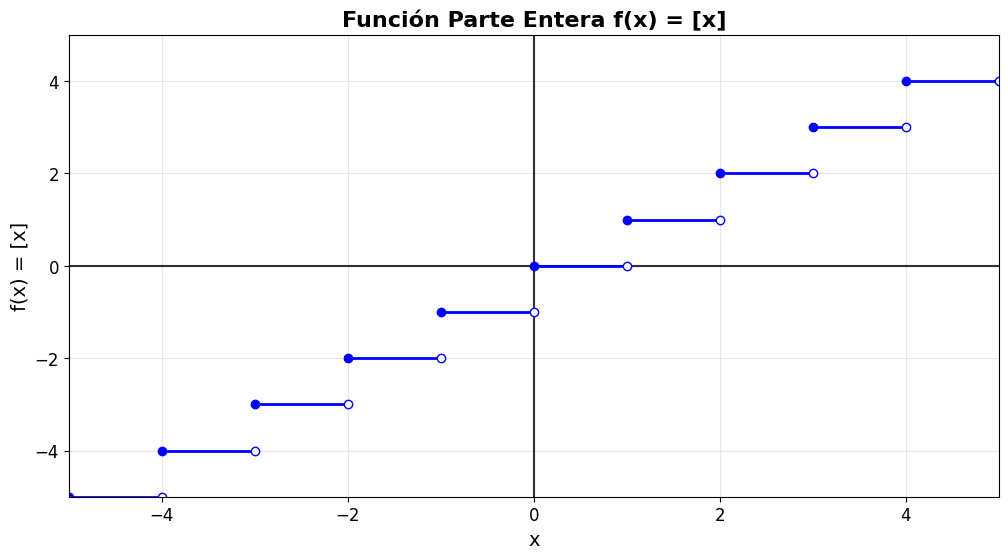

In [ ]:
# Gabriel Lugo Rosete
#Funcion "Parte Entera"

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 12

def parte_entera(x):
  return np.floor(x)

plt.figure(figsize=(12,6))

plt.axhline(y=0, color='black', linewidth=1.5, alpha=0.8)
plt.axvline(x=0, color='black', linewidth=1.5, alpha=0.8)

for n in range(-5,5):
  x_segment = np.linspace(n, n+1, 100, endpoint=False)
  y_segment = n * np.ones_like(x_segment)
  plt.plot(x_segment, y_segment, 'b-', linewidth=2)

  plt.plot(n, n, 'bo', markersize=6)
  plt.plot(n+1, n, 'bo', markerfacecolor='white', markersize=6)

plt.title('Función Parte Entera f(x) = [x]', fontsize=16, fontweight='bold')
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = [x]', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

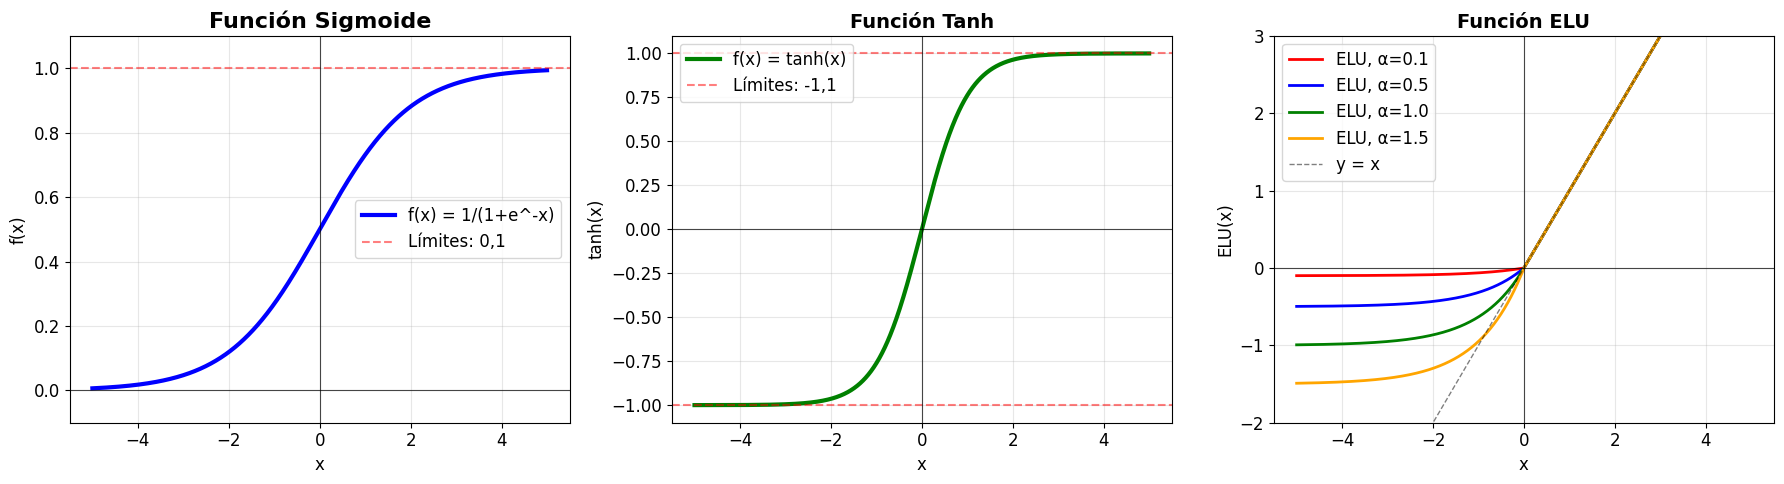

In [ ]:
# Asíntotas 1. 2. 3.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 12

x = np.linspace(-5, 5, 1000)

def sigmoide(x):
  return 1/(1+np.exp(-x))

def tanh_a(x):
  return np.tanh(x)

def elu(x, alpha= 1.0):
  return np.where(x >= 0, x, alpha * (np.exp(x)-1))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Gráfica función de activación sigmoide
axes[0].plot(x, sigmoide(x), 'b-', linewidth=3, label='f(x) = 1/(1+e^-x)')
axes[0].axhline(y=0, color='black', linewidth=0.8, alpha=0.7)
axes[0].axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Límites: 0,1')
axes[0].axvline(x=0, color='black', linewidth=0.8, alpha=0.7)
axes[0].grid(True, alpha=0.3)
axes[0].set_title('Función Sigmoide', fontsize=16, fontweight='bold')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('f(x)', fontsize=12)
axes[0].legend()
axes[0].set_ylim(-0.1, 1.1)

#Gráfica función de activación f(x) = tanh(x)
axes[1].plot(x, tanh_a(x), 'g-', linewidth=3, label='f(x) = tanh(x)')
axes[1].axhline(y=0, color='black', linewidth=0.8, alpha=0.7)
axes[1].axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Límites: -1,1')
axes[1].axhline(y=-1, color='red', linestyle='--', alpha=0.5)
axes[1].axvline(x=0, color='black', linewidth=0.8, alpha=0.7)
axes[1].grid(True, alpha=0.3)
axes[1].set_title('Función Tanh', fontsize=14, fontweight='bold')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('tanh(x)', fontsize=12)
axes[1].legend()
axes[1].set_ylim(-1.1, 1.1)

#Gráfica función de activación ELU
alpha_val = [0.1, 0.5, 1.0, 1.5]
colores = ['red', 'blue', 'green', 'orange']

for alpha, color in zip(alpha_val, colores):
  axes[2].plot(x, elu(x, alpha), color=color, linewidth=2,
               label=f'ELU, α={alpha}')

axes[2].plot(x, x, 'k--', alpha=0.5, linewidth=1, label='y = x')
axes[2].axhline(y=0, color='black', linewidth=0.8, alpha=0.7)
axes[2].axvline(x=0, color='black', linewidth=0.8, alpha=0.7)
axes[2].grid(True, alpha=0.3)
axes[2].set_title('Función ELU', fontsize=14, fontweight='bold')
axes[2].set_xlabel('x', fontsize=12)
axes[2].set_ylabel('ELU(x)', fontsize=12)
axes[2].legend()
axes[2].set_ylim(-2, 3)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

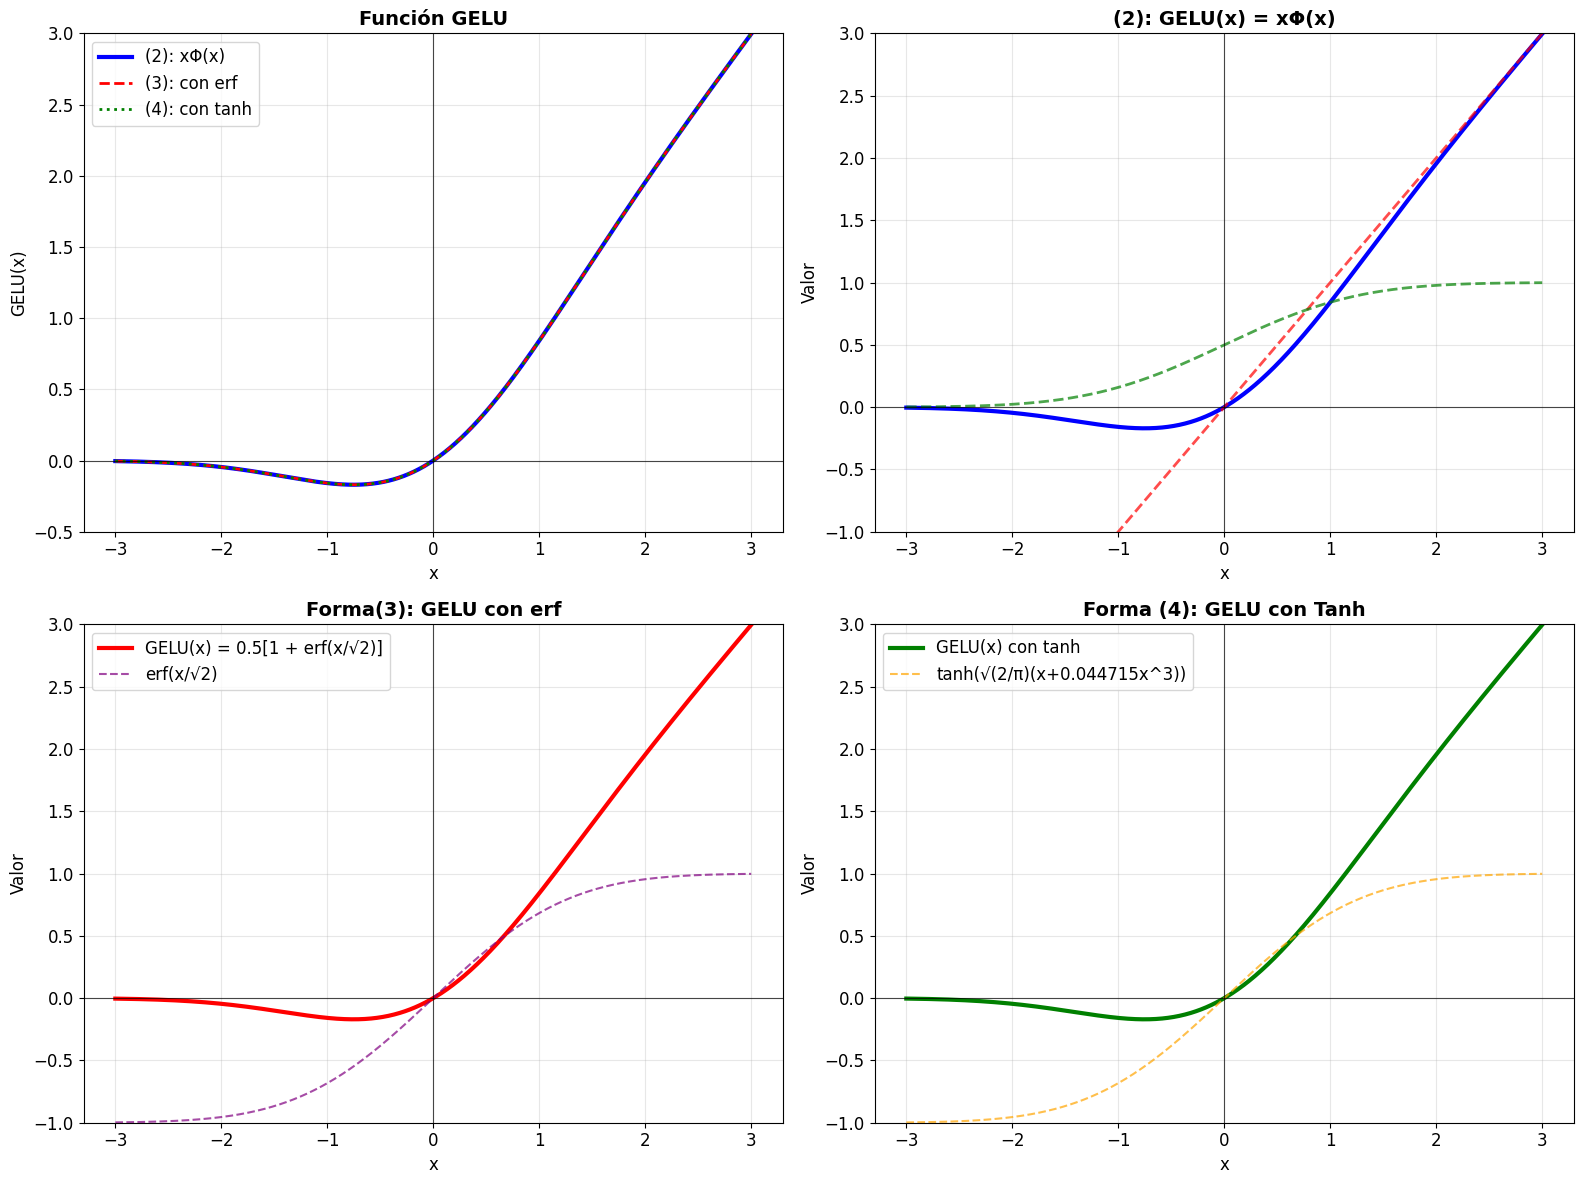

In [ ]:
#Asíntotas 4. GELU
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import erf

plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['font.size'] = 12

x = np.linspace(-3, 3, 1000)

# (2): GELU(x) = xΦ(x) = xP(X≤x)
def gelu_2(x):
  def normal_cdf(z):
    return (1+erf(z/np.sqrt(2))) / 2

  return x*normal_cdf(x)

# (3): GELU(x) = (1/2)x[1+erf(x/√2)]
def gelu_3(x):
  return 0.5 * x * (1 + erf(x/np.sqrt(2)))

def gelu_4(x):
  return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

def normal_cdf(x):
  return (1+erf(x/np.sqrt(2))) / 2

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#Gráfica 1: Comparación 3 formas
axes[0,0].plot(x, gelu_2(x), 'b-', linewidth=3, label='(2): xΦ(x)')
axes[0,0].plot(x, gelu_3(x), 'r--', linewidth=2, label='(3): con erf')
axes[0,0].plot(x, gelu_4(x), 'g:', linewidth=2, label='(4): con tanh')

axes[0,0].axhline(y=0, color='black', linewidth=0.8, alpha=0.7)
axes[0,0].axvline(x=0, color='black', linewidth=0.8, alpha=0.7)
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_title('Función GELU', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('x', fontsize=12)
axes[0,0].set_ylabel('GELU(x)', fontsize=12)
axes[0,0].legend()
axes[0,0].set_ylim(-0.5, 3)

#Forma (2)
axes[0,1].plot(x, gelu_2(x), 'b-', linewidth=3, label='GELU(x) = xΦ(x)')
axes[0,1].plot(x, x, 'r--', linewidth=2, alpha=0.7, label='y = x')
axes[0,1].plot(x, normal_cdf(x), 'g--', linewidth=2, alpha=0.7, label='Φ(x) = CDF(x)')

axes[0,1].axhline(y=0, color='black', linewidth=0.8, alpha=0.7)
axes[0,1].axvline(x=0, color='black', linewidth=0.8, alpha=0.7)
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_title('(2): GELU(x) = xΦ(x)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('x', fontsize=12)
axes[0,1].set_ylabel('Valor', fontsize=12)
axes[0,1].legend
axes[0,1].set_ylim(-1,3)

#Forma (3)
axes[1,0].plot(x, gelu_3(x), 'r-', linewidth=3, label='GELU(x) = 0.5[1 + erf(x/√2)]')
axes[1,0].plot(x, erf(x/np.sqrt(2)), 'purple', linestyle='--', alpha=0.7, label='erf(x/√2)')

axes[1,0].axhline(y=0, color='black', linewidth=0.8, alpha=0.7)
axes[1,0].axvline(x=0, color='black', linewidth=0.8, alpha=0.7)
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_title('Forma(3): GELU con erf', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('x', fontsize=12)
axes[1,0].set_ylabel('Valor', fontsize=12)
axes[1,0].legend()
axes[1,0].set_ylim(-1,3)

#Forma(4)
axes[1,1].plot(x, gelu_4(x), 'g-', linewidth=3, label='GELU(x) con tanh')
axes[1,1].plot(x, np.tanh(np.sqrt(2/np.pi)*(x+0.044715 * x**3)),
               'orange', linestyle='--', alpha=0.7,
               label='tanh(√(2/π)(x+0.044715x^3))')

axes[1,1].axhline(y=0, color='black', linewidth=0.8, alpha=0.7)
axes[1,1].axvline(x=0, color='black', linewidth=0.8, alpha=0.7)
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_title('Forma (4): GELU con Tanh', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('x', fontsize=12)
axes[1,1].set_ylabel('Valor', fontsize=12)
axes[1,1].legend()
axes[1,1].set_ylim(-1,3)

plt.tight_layout()
plt.show

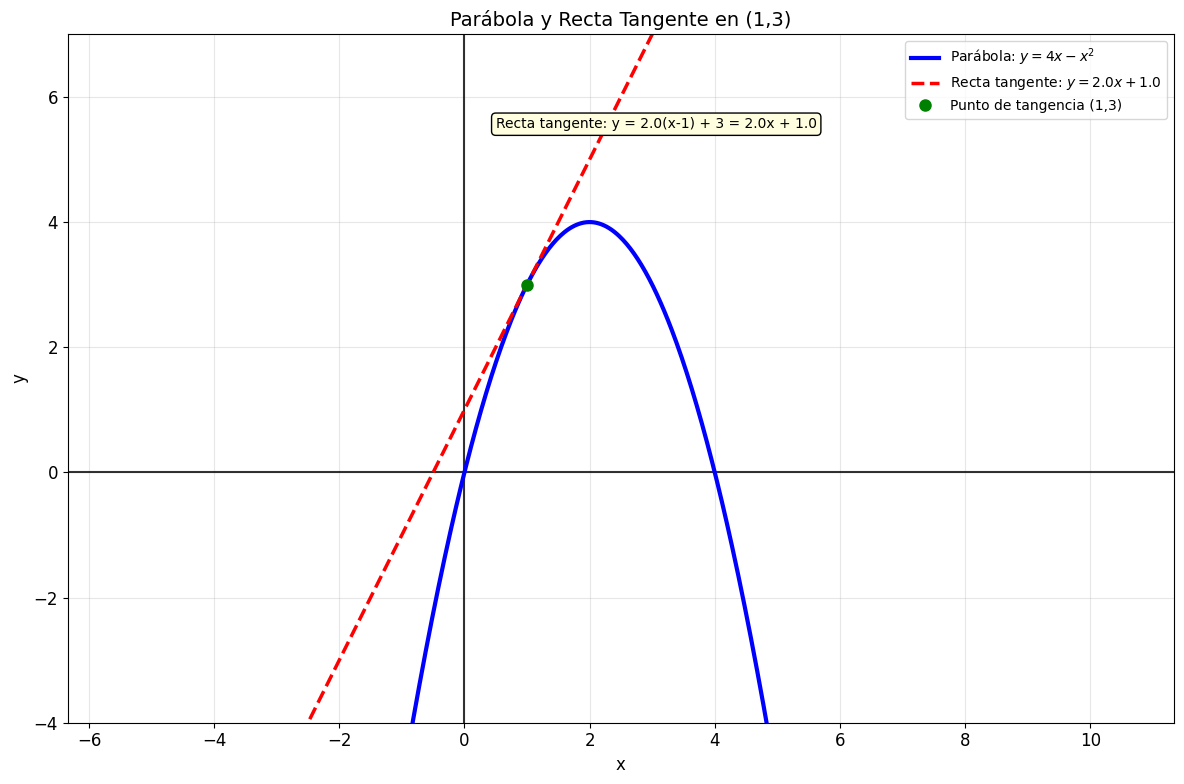

In [ ]:
#Derivadas 8. y=4x-x^2
import numpy as np
import matplotlib.pyplot as plt

def parabola(x):
  return 4*x - x**2

def derivada(x):
  return 4-2*x

#Punto de tangencia
x0 = 1
y0 = 3

#Calcular la pendiente en x=1
m = derivada(x0)

def recta_tangente(x):
  return m*(x - x0) + y0

x_parabola = np.linspace(-2, 6, 400)
x_tangente= np.linspace(-3, 7, 200)

y_parabola = parabola(x_parabola)
y_tangente = recta_tangente(x_tangente)

plt. figure(figsize=(12,8))

plt.axhline(y=0, color='k', linewidth=1.5, alpha=0.8)
plt.axvline(x=0, color='k', linewidth=1.5, alpha=0.8)

plt.plot(x_parabola, y_parabola, 'b-', linewidth=3, label='Parábola: $y = 4x - x^2$')

plt.plot(x_tangente, y_tangente, 'r--', linewidth=2.5, label=f'Recta tangente: $y = {m:.1f}x + {y0 - m*x0:.1f}$')

plt.plot(x0, y0, 'go', markersize=8, label=f'Punto de tangencia ({x0},{y0})')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Parábola y Recta Tangente en (1,3)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.axis('equal')

plt.xlim(-3, 8)
plt.ylim(-4, 7)

ecuacion_tangente = f'y = {m:.1f}(x-{x0}) + {y0} = {m:.1f}x + {y0 - m*x0:.1f}'
plt.text(0.5, 5.5, f'Recta tangente: {ecuacion_tangente}', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow'))

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

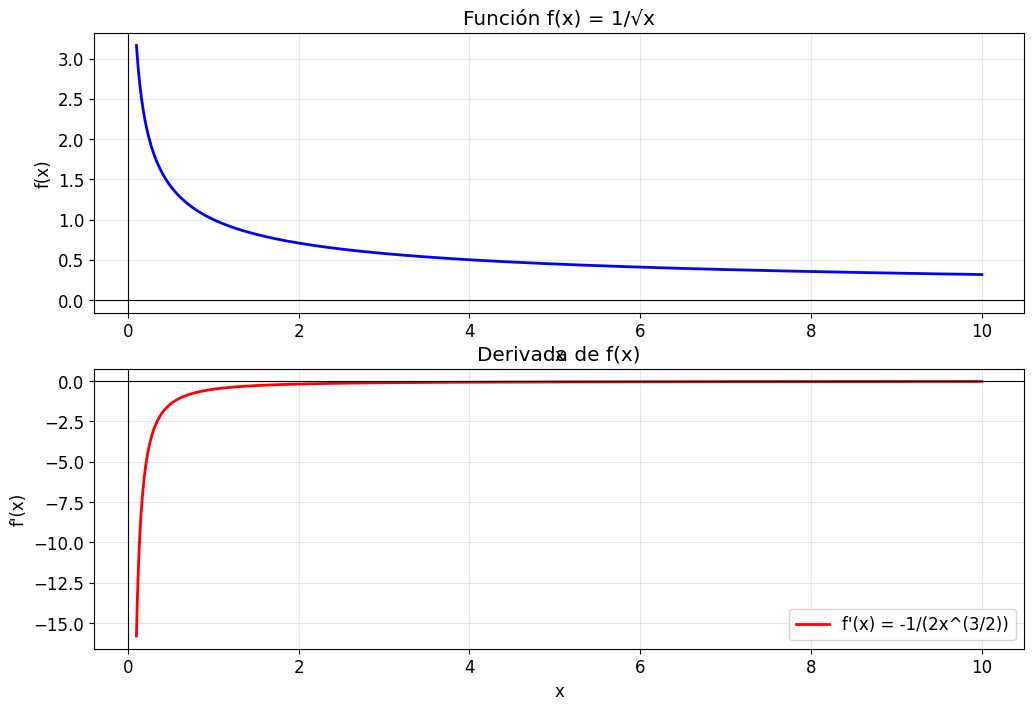

In [ ]:
#Derivadas 9. f(x)=1/√x
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return 1 / np.sqrt(x)

def df(x):
  return -1 / (2 * x**(3/2))

x = np.linspace(0.1, 10, 1000)

y=f(x)
dy = df(x)

plt.figure(figsize=(12,8))

plt.subplot(2, 1, 1)
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = 1/√x')
plt.title('Función f(x) = 1/√x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)

plt.axhline(y=0, color='k', linewidth=0.8)
plt.axvline(x=0, color='k', linewidth=0.8)
plt.legend

plt.subplot(2, 1, 2)
plt.plot(x, dy, 'r-', linewidth=2, label="f'(x) = -1/(2x^(3/2))")
plt.title('Derivada de f(x)')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.grid(True, alpha=0.3)

plt.axhline(y=0, color='k', linewidth=0.8)
plt.axvline(x=0, color='k', linewidth=0.8)
plt.legend()

plt.tight_layout
plt.show